# CA 03
## Pardis Zandkarimi - 810101081


## Introduction:
In this CA we learn about Naive Bayes and do simple tasks using persian handwritten numbers dataset. In the end we also check the accuracy of the model in two conditions: with smoothing technique and without smoothing.

# Phase 1:
## Q1: How did you split train and test data? Why?
### I used 0.2 weight of all data for test and used the rest of it as train. (6000 * 0.2 = 4800). In general, a smaller ratio of test data is preferred if the size of the dataset is large, while a larger ratio of test data is preferred if the dataset is small.

First of all we import the libraries that are going to be used in the following code.

In [48]:
import pickle
import random
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import scipy.stats as sp
import copy

Reading inputs data.pk and label.pk:

In [49]:
#### reading inputs data.pk and label.pk ###
pkl_file = open('data.pkl', 'rb')
data = pickle.load(pkl_file)
pkl_label = open('label.pkl', 'rb')
label = pickle.load(pkl_label)

## Q2: Show a random picture and show the max and the min pixel number.

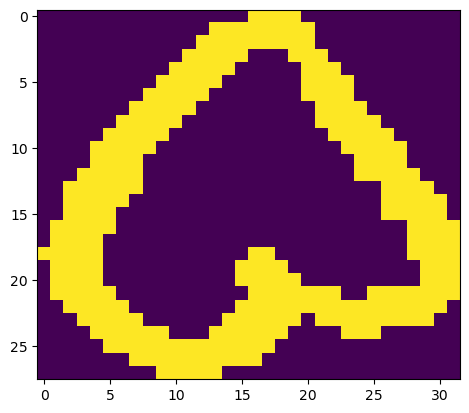

In [50]:
### show a random picture using matplotlib ###
i = random.randint(0, (len(data)-1))
plt.imshow(data[i])
plt.show()

In [51]:
### finding max and min pixel ###
print(min([min(r) for r in data[i]])) 
print(max([max(r) for r in data[i]]))

0
255


## Q3 - Q6: The size of images are different. Resize the pictures and explain why this is necessary. What happens if we don't normalize image pixels?
### In the following code we are going to predict the test data by processing the image blocks so we need all the pictures to have same block cells. I also normalized the data list in the loop to avoid redundancy. If we don't normalize the pixel numbers It may cause probability > 1.

In [52]:

def resize_normalize_image(image, new_width, new_height):
  # Convert the 2D list to a PIL image object
  pil_image = Image.fromarray(image)

  # Resize the image using PIL
  resized_image = pil_image.resize((new_width, new_height))

  # Convert the resized PIL image back to a 2D list
  resized_array = []
  for y in range(new_height):
    row = []
    for x in range(new_width):
      pixel = resized_image.getpixel((x, y))
      row.append(pixel / 255)
    resized_array.append(row)

  return resized_array


In [53]:
### resizing and normalization###
resized_data = []
for i in range(0, len(data)):
  resized_data.append(resize_normalize_image(data[i], 20, 20))

Split train data and test data in the way we have same count of images for each class:

In [54]:
train_data, test_data, train_labels, test_labels = train_test_split(
  resized_data, label, test_size=0.2, random_state=42)

test_labels_numpyArray = np.array(test_labels)
train_labels_numpyArray = np.array(train_labels)

## Q4: Show an image for each class and show the labels.

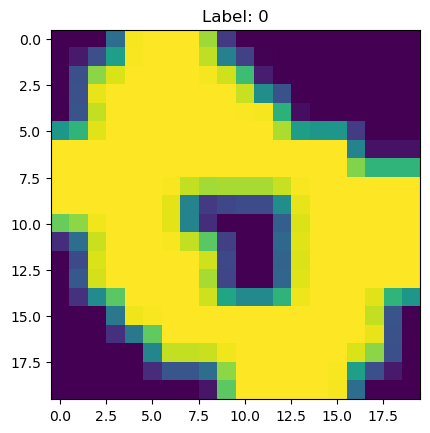

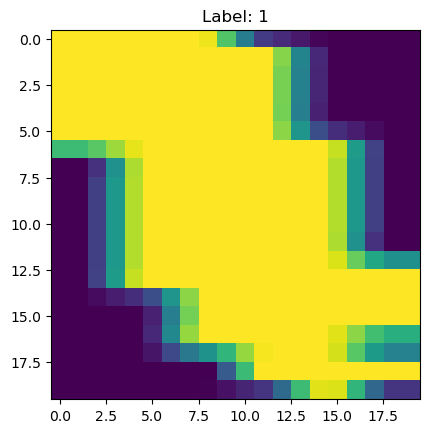

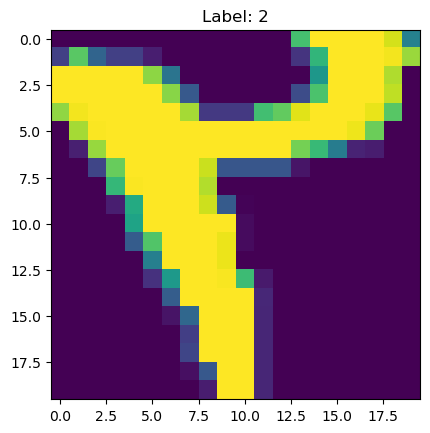

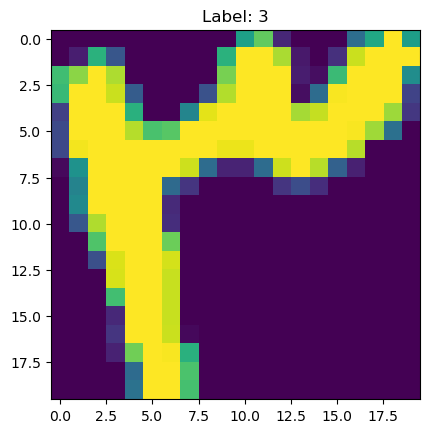

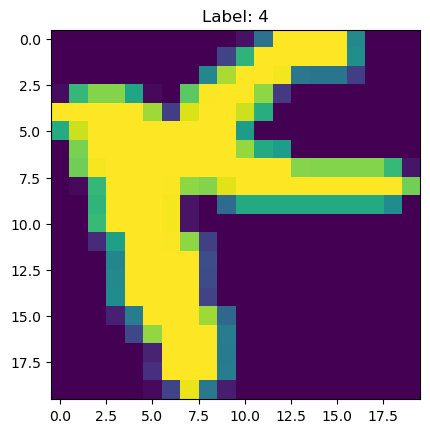

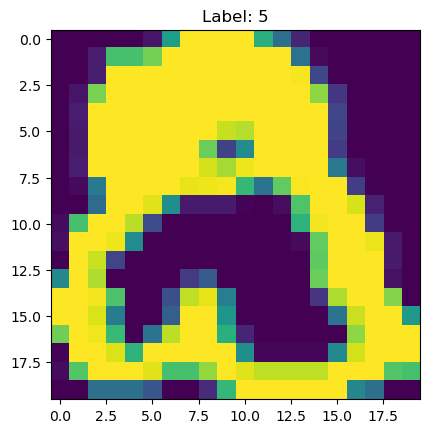

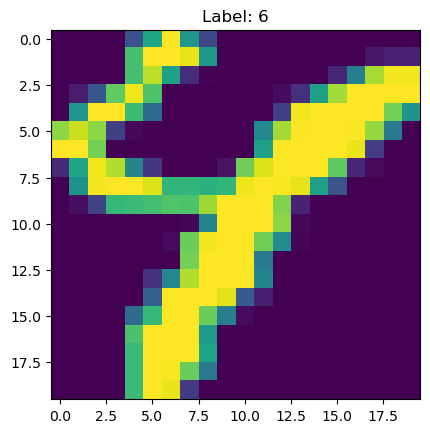

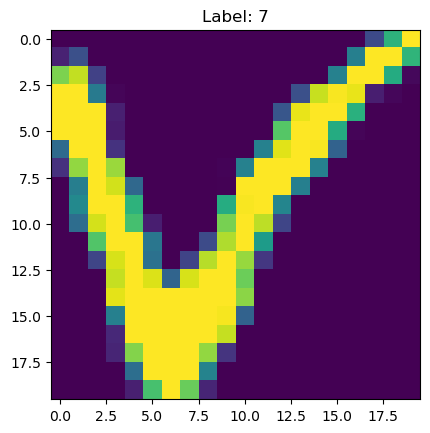

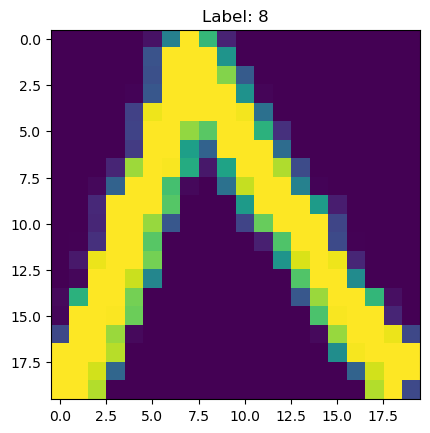

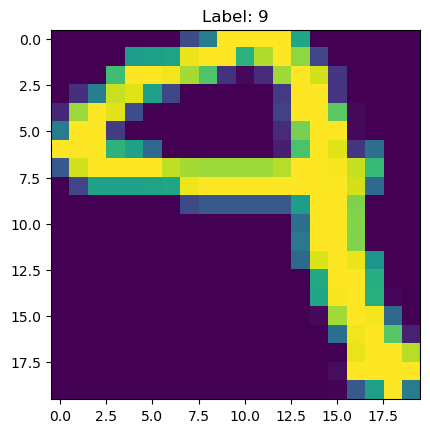

In [55]:
for j in range (0, 10):
    i = train_labels.index(j)
    plt.figure()
    plt.subplot(1,1,1)
    plt.imshow(train_data[i])
    plt.title(f"Label: {j}")
    plt.show()



## Q5: Show bar graph and show frequency of appearing each class in train and test.

In [56]:
#####prepare data to draw graphs####
test_appearence = []
train_appearence = []
for i in range(0, 10):
  test_appearence.append(np.count_nonzero(test_labels_numpyArray == int(i)))
  train_appearence.append(np.count_nonzero(train_labels_numpyArray == int(i)))

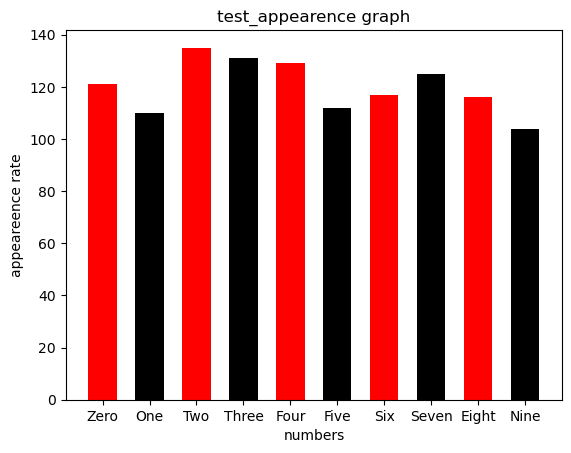

In [57]:
 ##### show bar graph to show appearence rate of each number in test list#####
left_coordinates=[0,1,2,3,4,5,6,7,8,9]
heights=test_appearence
bar_labels=['Zero','One','Two','Three','Four','Five', 'Six', 'Seven', 'Eight', 'Nine']
plt.bar(left_coordinates,heights,tick_label=bar_labels,width=0.6,color=['red','black'])
plt.xlabel('numbers')
plt.ylabel('appeareence rate')
plt.title("test_appearence graph")
plt.show()

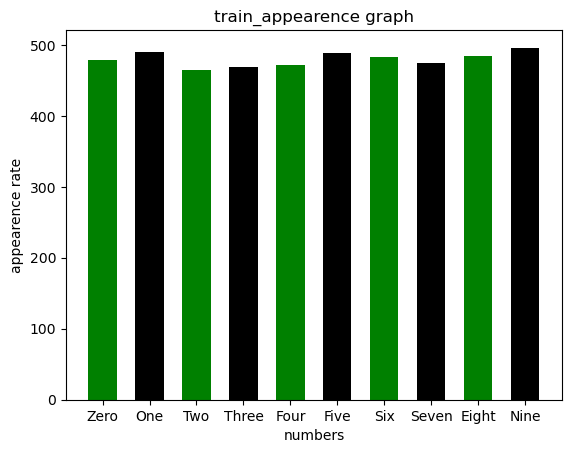

In [58]:
  ##### show bar graph to show appearence rate of each number in train list#####
left_coordinates=[0,1,2,3,4,5,6,7,8,9]
heights=train_appearence
bar_labels=['Zero','One','Two','Three','Four','Five', 'Six', 'Seven', 'Eight', 'Nine']
plt.bar(left_coordinates,heights,tick_label=bar_labels,width=0.6,color=['green','black'])
plt.xlabel('numbers')
plt.ylabel('appearence rate')
plt.title("train_appearence graph")
plt.show()

## Q7: What are posterior, preior, likelihood and evidence in this question?
### likelihood: probability that 

# Gaussian Naive Bayes

In [59]:
# Combine train_data and train_labels into a list of tuples
data_with_labels = list(zip(train_data, train_labels))
# Sort the list of tuples based on the label value in ascending order
sorted_data_with_labels = sorted(data_with_labels,
                                 key=lambda x: x[1],
                                 reverse=False)
# Separate the sorted data and labels back into two separate lists
sorted_train_data = [d for d, l in sorted_data_with_labels]
sorted_train_labels = [l for d, l in sorted_data_with_labels]

classes_data = []
for class_iterator in range(0, 10):
  classes_data.append(sorted_train_data[class_iterator *480:(class_iterator + 1) * 480])


In [60]:
def norm1(mean, var, x):
  # prob_density = (1/math.sqrt(2*np.pi*var)) * np.exp(-0.5*((x-mean))**2/var)
  constant = 1 / np.sqrt(2 * np.pi * var)
  # print(constant)
  soorat = (x - mean)**2
  # print(soorat)
  makhraj = 2 * var
  # print(makhraj)
  # prob_density = (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-((x - mean)**2) / (2 * var))
  prob_density = constant * np.exp(-soorat / makhraj)
  return prob_density

def gaussian_prediction(stds, means, test0):
  epsilon = 1e-9
  sums = []
  for class_i in range(0, 10):
    probs = []
    for i_i in range(0, 20):
      for j_i in range(0, 20):
        index = (class_i * 400) + (i_i * 20) + j_i
        p = norm1(means[index], stds[index], test0[i_i][j_i])
        if (p <= 0):
          p = epsilon
        probs.append(math.log(p))
    sums.append(np.array(probs).sum())
  return np.argmax(np.array(sums))



### Without smoothing:

In [61]:
#### gaussian prediction #####
epsilon = 1e-20
means = []
stds = []
for class_i in range (0, 10):
  for i_i in range (0,20):
    for j_i in range (0,20):
      A = []
      for pic_i in range(0, 480):
        A.append(classes_data[class_i][pic_i][i_i][j_i])
      mean1 = np.mean(A)
      means.append(mean1)
      std1 = np.std(A)
      var = std1 ** 2
      if var < epsilon:
        var = epsilon
      stds.append(var)

accuracy = 0
correct_detected_class = [0,0,0,0,0,0,0,0,0,0]
all_detected_class = [0,0,0,0,0,0,0,0,0,0]
precision = [0,0,0,0,0,0,0,0,0,0]
recall = [0,0,0,0,0,0,0,0,0,0]
f1 = [0,0,0,0,0,0,0,0,0,0]
for test_i in range (0, len(test_data)):
  prediction_result =  gaussian_prediction(stds, means, test_data[test_i])
  all_detected_class[prediction_result] += 1
  if(prediction_result == test_labels[test_i]):
    accuracy += 1
    correct_detected_class[prediction_result] += 1
for i in range (0, 10):
    precision[i] = correct_detected_class[i] / all_detected_class[i]
    recall[i] = correct_detected_class[i] / 480
    f1[i] = 2 * (precision[i]*recall[i]) / (precision[i] + recall[i])
print(f'accuracy: {accuracy/len(test_labels)} ')
print('precision: ')
print(precision)
print('recall: ')
print(recall)
print('f1: ')
print(f1)

accuracy: 0.7675 
precision: 
[0.9487179487179487, 0.88, 0.6538461538461539, 0.5240174672489083, 0.8378378378378378, 0.9224137931034483, 0.9866666666666667, 0.9736842105263158, 0.9504132231404959, 0.5174129353233831]
recall: 
[0.23125, 0.1375, 0.10625, 0.25, 0.12916666666666668, 0.22291666666666668, 0.15416666666666667, 0.23125, 0.23958333333333334, 0.21666666666666667]
f1: 
[0.37185929648241206, 0.23783783783783785, 0.1827956989247312, 0.3385049365303244, 0.22382671480144406, 0.35906040268456374, 0.26666666666666666, 0.37373737373737376, 0.38269550748752085, 0.3054331864904552]


### With smoothing:

In [62]:
#### gaussian prediction #####
epsilon = 1e-2
means = []
stds = []
for class_i in range (0, 10):
  for i_i in range (0,20):
    for j_i in range (0,20):
      A = []
      for pic_i in range(0, 480):
        A.append(classes_data[class_i][pic_i][i_i][j_i])
      mean1 = np.mean(A)
      means.append(mean1)
      std1 = np.std(A)
      var = std1 ** 2
      if var < epsilon:
        var = epsilon
      stds.append(var)

accuracy = 0
correct_detected_class = [0,0,0,0,0,0,0,0,0,0]
all_detected_class = [0,0,0,0,0,0,0,0,0,0]
precision = [0,0,0,0,0,0,0,0,0,0]
recall = [0,0,0,0,0,0,0,0,0,0]
f1 = [0,0,0,0,0,0,0,0,0,0]
for test_i in range (0, len(test_data)):
  prediction_result =  gaussian_prediction(stds, means, test_data[test_i])
  all_detected_class[prediction_result] += 1
  if(prediction_result == test_labels[test_i]):
    accuracy += 1
    correct_detected_class[prediction_result] += 1
for i in range (0, 10):
    precision[i] = correct_detected_class[i] / all_detected_class[i]
    recall[i] = correct_detected_class[i] / 480
    f1[i] = 2 * (precision[i]*recall[i]) / (precision[i] + recall[i])
print(f'accuracy: {accuracy/len(test_labels)} ')
print('precision: ')
print(precision)
print('recall: ')
print(recall)
print('f1: ')
print(f1)

accuracy: 0.8533333333333334 
precision: 
[0.940677966101695, 0.8571428571428571, 0.7203389830508474, 0.6770186335403726, 0.8620689655172413, 0.9145299145299145, 0.9468085106382979, 0.9516129032258065, 0.9826086956521739, 0.7727272727272727]
recall: 
[0.23125, 0.1875, 0.17708333333333334, 0.22708333333333333, 0.20833333333333334, 0.22291666666666668, 0.18541666666666667, 0.24583333333333332, 0.23541666666666666, 0.2125]
f1: 
[0.37123745819397996, 0.30769230769230765, 0.2842809364548495, 0.34009360374414976, 0.33557046979865773, 0.35845896147403683, 0.31010452961672474, 0.39072847682119205, 0.3798319327731092, 0.3333333333333333]


# Bernoulli Naive Bayes

In [63]:
def bernoulli_prediction(means, test0):
  sums = []
  for class_i in range(0, 10):
    probs = []
    for i_i in range(0, 20):
      for j_i in range(0, 20):
        index = (class_i * 400) + (i_i * 20) + j_i
        if (test0[i_i][j_i] > 0.5):
          test0[i_i][j_i] = 1
        else:
          test0[i_i][j_i] = 0
        p = ((means[index])**(test0[i_i][j_i])) * (
          (1 - means[index])**(1 - test0[i_i][j_i]))
        if (p <= 0):
          p = 1e-40
        probs.append(math.log(p))
    sums.append(np.array(probs).sum())
  return np.argmax(np.array(sums))


In [64]:
b_means = []
b_smoothing_sums = []
for class_i in range(0, 10):
  for i_i in range(0, 20):
    for j_i in range(0, 20):
      A = []
      for pic_i in range(0, 480):
        if (classes_data[class_i][pic_i][i_i][j_i] > 0.5):
          classes_data[class_i][pic_i][i_i][j_i] = 1
        else:
          classes_data[class_i][pic_i][i_i][j_i] = 0
        A.append(classes_data[class_i][pic_i][i_i][j_i])
      b_means.append(sum(A) / 480)
      alpha = 1
      b_smoothing_sums.append(((sum(A) + alpha) / (480 + (2 * alpha))))

## Without smoothing:

In [65]:
accuracy = 0
correct_detected_class = [0,0,0,0,0,0,0,0,0,0]
all_detected_class = [0,0,0,0,0,0,0,0,0,0]
precision = [0,0,0,0,0,0,0,0,0,0]
recall = [0,0,0,0,0,0,0,0,0,0]
f1 = [0,0,0,0,0,0,0,0,0,0]
for test_i in range(0, len(test_data)):
  prediction_result =  bernoulli_prediction(b_means, test_data[test_i])
  all_detected_class[prediction_result] += 1
  if (prediction_result == test_labels[test_i]):
    accuracy += 1
    correct_detected_class[prediction_result] += 1
for i in range (0, 10):
    precision[i] = correct_detected_class[i] / all_detected_class[i]
    recall[i] = correct_detected_class[i] / 480
    f1[i] = 2 * (precision[i]*recall[i]) / (precision[i] + recall[i])
print(f'accuracy: {accuracy/len(test_labels)} ')
print('precision: ')
print(precision)
print('recall: ')
print(recall)
print('f1: ')
print(f1)
print ("macro_avg: ")
print(sum(f1)/10)


accuracy: 0.87 
precision: 
[0.9193548387096774, 0.8584905660377359, 0.6934306569343066, 0.7983870967741935, 0.8854961832061069, 0.9391304347826087, 0.9270833333333334, 0.9512195121951219, 1.0, 0.7803030303030303]
recall: 
[0.2375, 0.18958333333333333, 0.19791666666666666, 0.20625, 0.24166666666666667, 0.225, 0.18541666666666667, 0.24375, 0.23333333333333334, 0.21458333333333332]
f1: 
[0.37748344370860926, 0.310580204778157, 0.3079416531604538, 0.3278145695364238, 0.37970540098199673, 0.3630252100840336, 0.3090277777777778, 0.3880597014925373, 0.37837837837837834, 0.33660130718954245]
macro_avg: 
0.34786176470879104


## With smoothing:

In [68]:
accuracy = 0
correct_detected_class = [0,0,0,0,0,0,0,0,0,0]
all_detected_class = [0,0,0,0,0,0,0,0,0,0]
precision = [0,0,0,0,0,0,0,0,0,0]
recall = [0,0,0,0,0,0,0,0,0,0]
f1 = [0,0,0,0,0,0,0,0,0,0]
wrong_index = []
wrong_label = []
for test_i in range(0, len(test_data)):
  prediction_result =  bernoulli_prediction(b_smoothing_sums, test_data[test_i])
  all_detected_class[prediction_result] += 1
  if (prediction_result == test_labels[test_i]):
    accuracy += 1
  else:
    wrong_index.append(test_i)
    wrong_label.append(prediction_result)
    correct_detected_class[prediction_result] += 1
for i in range (0, 10):
    precision[i] = correct_detected_class[i] / all_detected_class[i]
    recall[i] = correct_detected_class[i] / 480
    f1[i] = 2 * (precision[i]*recall[i]) / (precision[i] + recall[i])
print(f'accuracy: {accuracy/len(test_labels)} ')
print('precision: ')
print(precision)
print('recall: ')
print(recall)
print('f1: ')
print(f1)
print ("macro_avg: ")
print(sum(f1)/10)

accuracy: 0.8708333333333333 
precision: 
[0.08064516129032258, 0.14150943396226415, 0.30656934306569344, 0.20161290322580644, 0.10236220472440945, 0.0603448275862069, 0.07216494845360824, 0.04878048780487805, 0.008771929824561403, 0.2196969696969697]
recall: 
[0.020833333333333332, 0.03125, 0.0875, 0.052083333333333336, 0.027083333333333334, 0.014583333333333334, 0.014583333333333334, 0.0125, 0.0020833333333333333, 0.06041666666666667]
f1: 
[0.03311258278145695, 0.051194539249146756, 0.1361426256077796, 0.08278145695364239, 0.042833607907742995, 0.023489932885906045, 0.024263431542461005, 0.019900497512437814, 0.0033670033670033673, 0.09477124183006537]
macro_avg: 
0.051185691963764234


## Q8: 
Cause if probability of one pixel was equal to zero, for that class the test probability to be in that class would be equal to zero and it almost loses the chance to match with that class.

## Q9: 
Smoothing works by redistributing probability mass from high-probability events to low-probability events, effectively making the model more robust and less likely to assign zero probability to unseen events. There are several smoothing techniques, such as Laplace smoothing, add-k smoothing, and Good-Turing smoothing. Here we used laplace smoothing for Bernoulli naive bayes model.

## Q10: 
Precision and recall are important metrics for evaluating an AI model's performance, especially in binary classification problems. However, they may not always be sufficient to fully evaluate the model's performance. For example, in cases where there is class imbalance (i.e., one class has significantly fewer samples than the other), precision and recall may not provide a complete picture of the model's performance. In such cases, other metrics such as the F1 score, which combines precision and recall, or the area under the receiver operating characteristic (ROC) curve may be more appropriate.

## Q11:  
F1 score is a harmonic mean of precision and recall. The harmonic mean is used instead of the arithmetic mean because it gives more weight to low values. In other words, if either precision or recall is low, the F1 score will also be low. The F1 score is therefore a better measure of model performance than either precision or recall alone. F1 score can take values between 0 and 1, with higher values indicating better performance.

## Q12: 
Multi-class metrics are performance evaluation metrics used to evaluate the performance of classification models when the output is a categorical variable with more than two possible values. These metrics can be used to evaluate the accuracy of a classifier, as well as its precision, recall, and F1 score, among other things. Examples of multi-class metrics include accuracy, macro-precision, macro-recall, macro-F1 score, micro-precision, micro-recall, and micro-F1 score. These metrics are calculated differently than binary classification metrics since they involve multiple classes, and often involve averaging across classes to obtain an overall performance score.
In the context of multi-class classification, macro, micro, and weighted mean are three ways to calculate the average of the evaluation metrics (such as precision, recall, or F1-score) across all classes.

Macro-average: This method calculates the metric independently for each class, and then takes the average over all classes. This means that each class is treated equally, regardless of the number of instances in that class.

Micro-average: This method first aggregates the true positives, false positives, and false negatives over all classes, and then calculates the metric based on the total counts. This means that all instances are treated equally, regardless of their class membership.

Weighted average: This method is similar to the macro-average, but takes into account the number of instances in each class. The metric for each class is weighted by the number of instances in that class, so that classes with more instances have a greater influence on the final score.

In general, the choice of which method to use depends on the problem at hand. If you are interested in how well the classifier performs on each individual class, then you might prefer the macro-average. If you are interested in the overall performance of the classifier, regardless of the class distribution, then the micro-average might be more appropriate. Finally, if you want to take into account the class distribution, then the weighted average might be the best choice.

## Q15: Draw 5 images that the model don't answer correctly for them

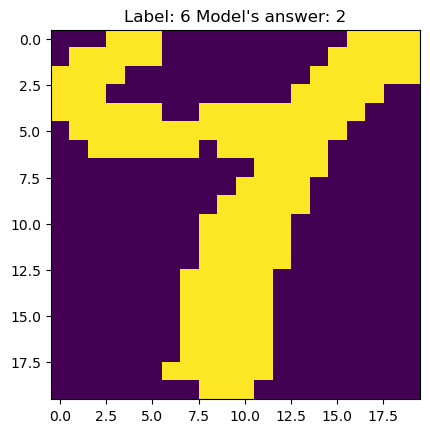

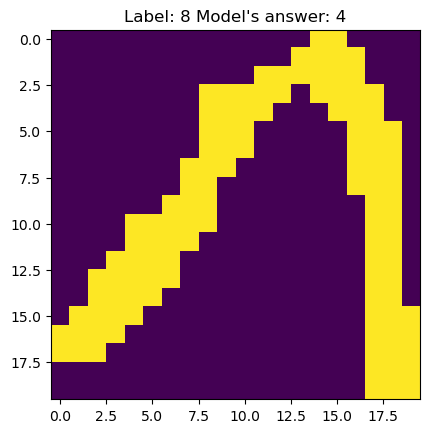

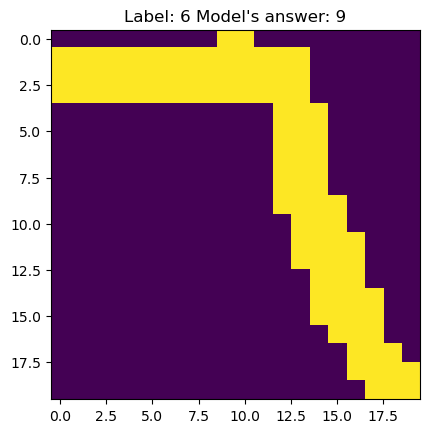

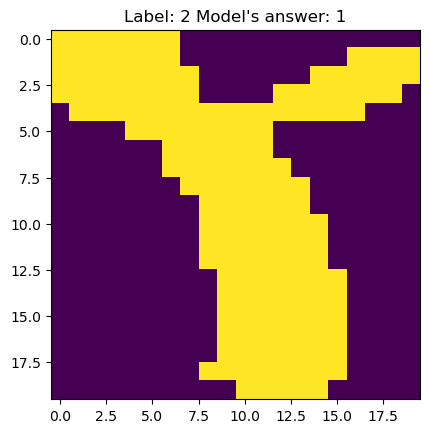

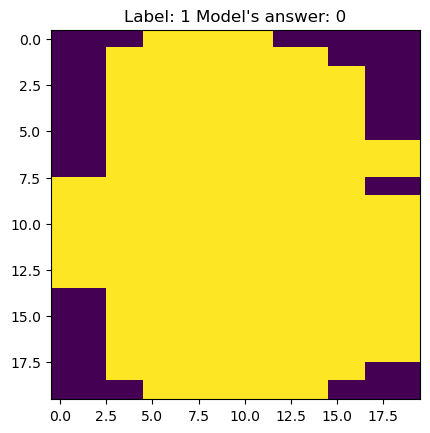

In [71]:
for j in range (0, 5):
    plt.figure()
    plt.subplot(1,1,1)
    plt.imshow(test_data[wrong_index[j]])
    plt.title(f"Label: {test_labels[wrong_index[j]]} Model's answer: {wrong_label[j]}")
    plt.show()